In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/TusharRanjan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<h1>This workflow is also replicated in preprocess.py.</h1>

In [2]:
df = pd.read_csv('flights.csv', low_memory=False)

In [3]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5819079, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

<h1>Exploratory Data Analysis</h1>

<h3>NaNs</h3>

In [6]:
for col in df.columns:
    print col, pd.isnull(df[col]).sum()

YEAR 0
MONTH 0
DAY 0
DAY_OF_WEEK 0
AIRLINE 0
FLIGHT_NUMBER 0
TAIL_NUMBER 14721
ORIGIN_AIRPORT 0
DESTINATION_AIRPORT 0
SCHEDULED_DEPARTURE 0
DEPARTURE_TIME 86153
DEPARTURE_DELAY 86153
TAXI_OUT 89047
WHEELS_OFF 89047
SCHEDULED_TIME 6
ELAPSED_TIME 105071
AIR_TIME 105071
DISTANCE 0
WHEELS_ON 92513
TAXI_IN 92513
SCHEDULED_ARRIVAL 0
ARRIVAL_TIME 92513
ARRIVAL_DELAY 105071
DIVERTED 0
CANCELLED 0
CANCELLATION_REASON 5729195
AIR_SYSTEM_DELAY 4755640
SECURITY_DELAY 4755640
AIRLINE_DELAY 4755640
LATE_AIRCRAFT_DELAY 4755640
WEATHER_DELAY 4755640


<h3>Year</h3>

(array([      0.,       0.,       0.,       0.,       0., 5819079.,
              0.,       0.,       0.,       0.]),
 array([2014.5, 2014.6, 2014.7, 2014.8, 2014.9, 2015. , 2015.1, 2015.2,
        2015.3, 2015.4, 2015.5]),
 <a list of 10 Patch objects>)

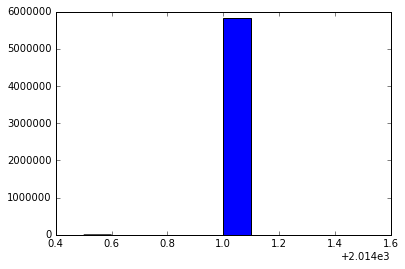

In [7]:
plt.hist(df['YEAR'])

In [8]:
df['YEAR'].unique()

array([2015])

The only value for YEAR is 2015. This makes sense because all of the data is from 2015. This column has no real predictive value and can, therefore, be discarded.

In [9]:
df.pop('YEAR')

0          2015
1          2015
2          2015
3          2015
4          2015
5          2015
6          2015
7          2015
8          2015
9          2015
10         2015
11         2015
12         2015
13         2015
14         2015
15         2015
16         2015
17         2015
18         2015
19         2015
20         2015
21         2015
22         2015
23         2015
24         2015
25         2015
26         2015
27         2015
28         2015
29         2015
           ... 
5819049    2015
5819050    2015
5819051    2015
5819052    2015
5819053    2015
5819054    2015
5819055    2015
5819056    2015
5819057    2015
5819058    2015
5819059    2015
5819060    2015
5819061    2015
5819062    2015
5819063    2015
5819064    2015
5819065    2015
5819066    2015
5819067    2015
5819068    2015
5819069    2015
5819070    2015
5819071    2015
5819072    2015
5819073    2015
5819074    2015
5819075    2015
5819076    2015
5819077    2015
5819078    2015
Name: YEAR, dtype: int64

<h2>CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY</h2>

The vast majority (5729195/5819079, or approximately 98.5%) of the CANCELLATION_REASON column is NaN. Similarly, the majority (4755640/5819079, or 81.7%) of the AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY are NANs. These five columns can be discarded.

More importantly, the AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY columns contain information that adds up to the total arrival or departure delay. In other words, keeping those columns would be cheating.

In [10]:
for i in ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']:
    df.pop(i)

<h3>Other NaNs</h3>

The following columns also have NaNs:
<ul>
    <li>TAIL_NUMBER (14721)</li>
    <li>DEPARTURE_TIME (86153)</li>
    <li>DEPARTURE_DELAY (86153)</li>
    <li>TAXI_OUT (89047)</li>
    <li>WHEELS_OFF (89047)</li>
    <li>SCHEDULED_TIME (6)</li>
    <li>ELAPSED_TIME (105071)</li>
    <li>AIR_TIME (105071)</li>
    <li>WHEELS_ON (92513)</li>
    <li>TAXI_IN (92513)</li>
    <li>ARRIVAL_TIME (92513)</li>
    <li>ARRIVAL_DELAY (105071)</li>
</ul>

In [11]:
14721 + 86153 + 86153 + 89047 + 89047 + 6 + 105071 + 105071 + 92513 + 92513 + 92513 + 105071

957879

At this point, the total number of rows remaining with at least one NaN is between 105071 and 957879. These columns are probably very important to predicting delays, so it will, instead, be necessary to delete the rows that have at least one NaN in them.

In [12]:
for i in df:
    df = df[pd.isnull(df[i]) == False]

In [13]:
df.shape

(5714008, 24)

In [14]:
1.0 - 5714008/5819079.

0.018056293788071942

Less than 2% of the rows in the dataframe have been deleted, so it's unlikely that deleting those rows will affect the model very much.

<h3>Other Integer Columns</h3>

In [15]:
intcols = [col for col in df.columns if df[col].dtype == 'int64']
len(intcols)

9

There are nine integer columns remaining in the dataframe. Their unique values are:

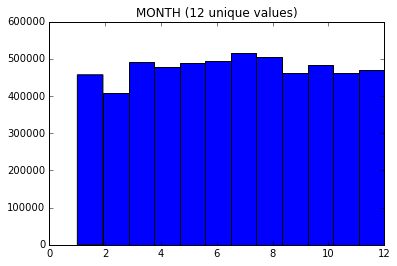

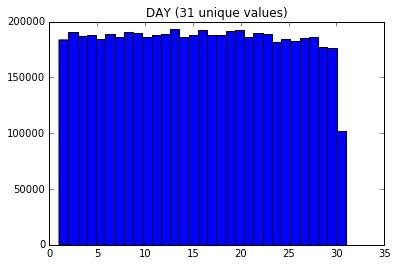

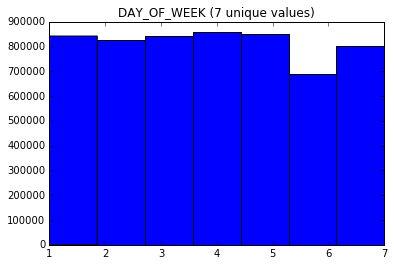

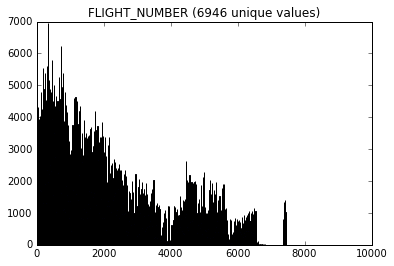

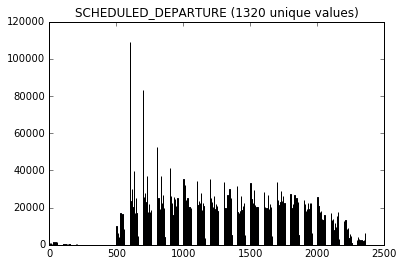

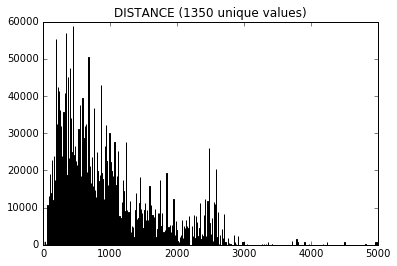

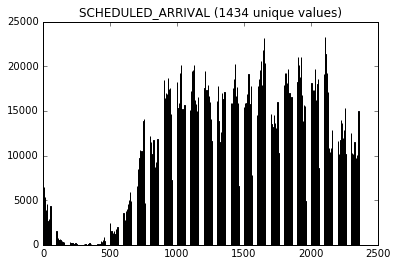

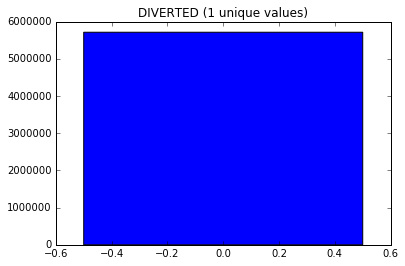

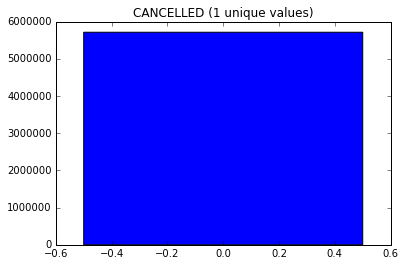

In [16]:
for col in intcols:
    plt.figure()
    numunique = len(df[col].unique())
    plt.title(col + ' (%i unique values)' % numunique)
    plt.hist(df[col], bins = numunique)

<h3>Floating point columns</h3>

In [17]:
floatcols = [col for col in df.columns if df[col].dtype == 'float64']
len(floatcols)

11

There are 11 floating point columns in the dataframe. Their histograms are shown below, each with 100 bins:

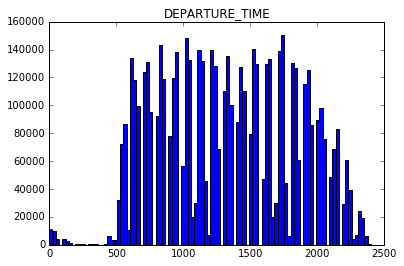

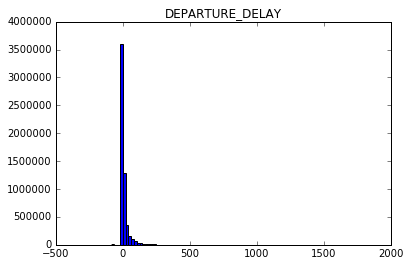

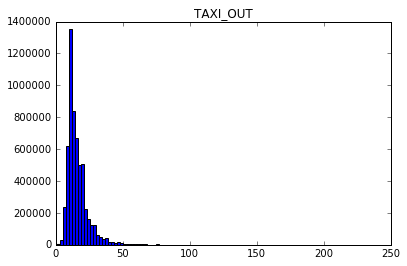

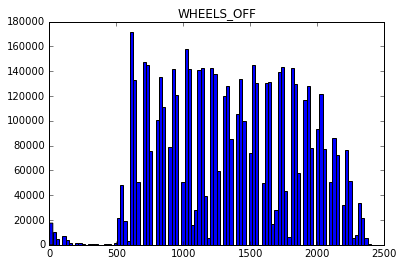

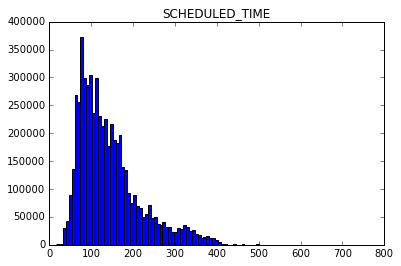

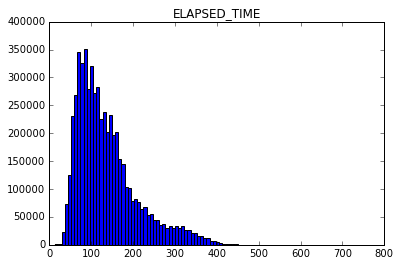

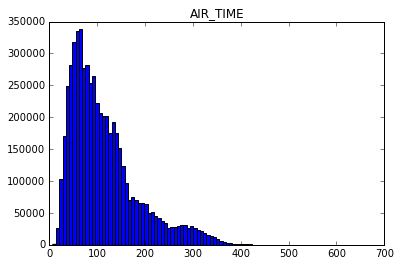

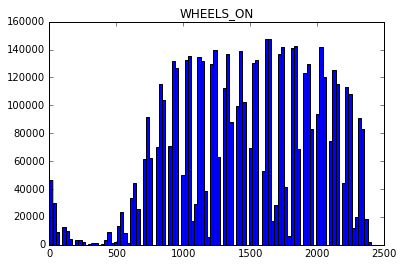

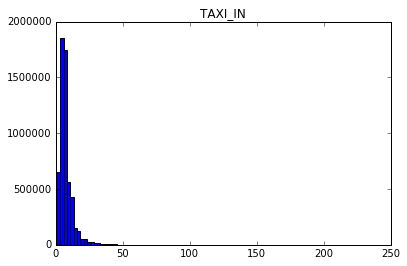

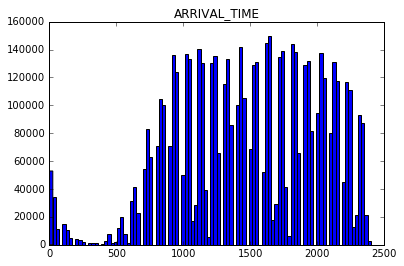

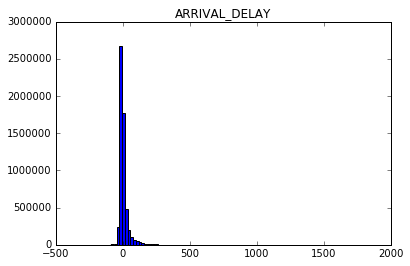

In [18]:
for col in floatcols:
    plt.figure()
    plt.title(col)
    plt.hist(df[col], bins = 100)

<h3>String columns</h3>

In [19]:
stringcols = [col for col in df.columns if df[col].dtype == 'object']
len(stringcols)

4

There are four string columns in the dataframe. The counts of their unique values are shown below:

In [20]:
for col in stringcols:
    print col, len(df[col].unique())

AIRLINE 14
TAIL_NUMBER 4896
ORIGIN_AIRPORT 628
DESTINATION_AIRPORT 629


<h1>Feature Engineering</h1>

In [21]:
df.columns

Index([u'MONTH', u'DAY', u'DAY_OF_WEEK', u'AIRLINE', u'FLIGHT_NUMBER',
       u'TAIL_NUMBER', u'ORIGIN_AIRPORT', u'DESTINATION_AIRPORT',
       u'SCHEDULED_DEPARTURE', u'DEPARTURE_TIME', u'DEPARTURE_DELAY',
       u'TAXI_OUT', u'WHEELS_OFF', u'SCHEDULED_TIME', u'ELAPSED_TIME',
       u'AIR_TIME', u'DISTANCE', u'WHEELS_ON', u'TAXI_IN',
       u'SCHEDULED_ARRIVAL', u'ARRIVAL_TIME', u'ARRIVAL_DELAY', u'DIVERTED',
       u'CANCELLED'],
      dtype='object')

<h3>Previous ARRIVAL_DELAY and DEPARTURE_DELAY</h3>

One new feature that may help predict the arrival and departure delay of a particular flight is the arrival and departure delay of the previous flight that the particular plane made. Each plane is, fortunately, identified by its tail number. Two new columns, PREVIOUS_ARRIVAL_DELAY and PREVIOUS_DEPARTURE_DELAY, can be added to this dataframe.

In [22]:
prev = {i:{'arrival':0, 'departure':0} for i in df['TAIL_NUMBER'].unique()}
prev_arr = []
prev_dep = []
for i in df[['TAIL_NUMBER', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY']].values:
    prev_arr.append(prev[i[0]]['arrival'])
    prev_dep.append(prev[i[0]]['departure'])
    prev[i[0]]['arrival'] = i[1]
    prev[i[0]]['departure'] = i[2]
df['PREVIOUS_ARRIVAL_DELAY'] = prev_arr
df['PREVIOUS_DEPARTURE_DELAY'] = prev_dep

<h3>FLIGHT_NUMBER and TAIL_NUMBER</h3>

There are nearly 7000 unique flight numbers and nearly 5000 unique tail numbers. Dummifying these columns would add nearly 12000 features to this dataframe, which might make it too big for the computer's RAM. Therefore, those columns will be discarded.

In [23]:
df.pop('FLIGHT_NUMBER')
df.pop('TAIL_NUMBER')

0          N407AS
1          N3KUAA
2          N171US
3          N3HYAA
4          N527AS
5          N3730B
6          N635NK
7          N584UW
8          N3LAAA
9          N826DN
10         N958DN
11         N853AA
12         N547US
13         N3751B
14         N651DL
15         N309AS
16         N3743H
17         N78448
18         N413AS
19         N806DN
20         N525NK
21         N3GXAA
22         N632NK
23         N3CTAA
24         N671DN
25         N76517
26         N457AS
27         N528NK
28         N571UW
29         N3HRAA
            ...  
5819049    N866AA
5819050    N569JB
5819051    N477AS
5819052    N586AS
5819053    N768AS
5819054    N431AS
5819055    N570AS
5819056    N536AS
5819057    N661NK
5819058    N332NW
5819059    N209FR
5819060    N701FR
5819061    N925FR
5819062    N949FR
5819063    N17245
5819064    N66848
5819065    N33209
5819066    N497UA
5819067    N3DLAA
5819068    N3LYAA
5819069    N948JB
5819070    N584JB
5819071    N589JB
5819072    N607JB
5819073   

<h3>DEPARTURE_TIME and ARRIVAL_TIME</h3>

These two columns are redundant because this dataframe already has SCHEDULED_DEPARTURE, SCHEDULED_ARRIVAL, DEPARTURE_DELAY, and ARRIVAL_DELAY. SCHEDULED_DEPARTURE + DEPARTURE_DELAY = DEPARTURE_TIME and SCHEDULED_ARRIVAL + ARRIVAL_DELAY = ARRIVAL_TIME. Therefore, DEPARTURE_TIME and ARRIVAL_TIME are not necessary and can be discarded.

In [24]:
df.pop('DEPARTURE_TIME')
df.pop('ARRIVAL_TIME')

0           408.0
1           741.0
2           811.0
3           756.0
4           259.0
5           610.0
6           509.0
7           753.0
8           532.0
9           656.0
10          453.0
11          753.0
12          605.0
13          553.0
14          557.0
15          455.0
16          451.0
17          619.0
18          507.0
19          551.0
20          543.0
21          939.0
22          529.0
23          839.0
24          545.0
25          607.0
26          545.0
27          607.0
28          754.0
29          709.0
            ...  
5819049     731.0
5819050     607.0
5819051     535.0
5819052     353.0
5819053     224.0
5819054     400.0
5819055     225.0
5819056     712.0
5819057     346.0
5819058     512.0
5819059     518.0
5819060     504.0
5819061     446.0
5819062     509.0
5819063     600.0
5819064     652.0
5819065     545.0
5819066     718.0
5819067     525.0
5819068     544.0
5819069    1020.0
5819070     744.0
5819071     625.0
5819072     519.0
5819073   

<h3>Converting SCHEDULED_DEPARTURE, SCHEDULED_ARRIVAL, WHEELS_OFF, and WHEELS_ON to minutes</h3>

The SCHEDULED_DEPARTURE, SCHEDULED_ARRIVAL, WHEELS_OFF, and WHEELS_ON columns are in the form HHMM, where 0 <= HH <= 23 and 0 <= MM < 60. That means that they're not truly indicative of how far into the day they are. They're essentially strings. Here, I convert each of these columns into minutes. For example, 1230 would be converted to 12\*60 + 30 = 750, 845 would be converted to 8\*60 + 45 = 525, and so on.

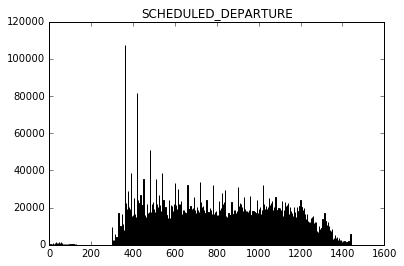

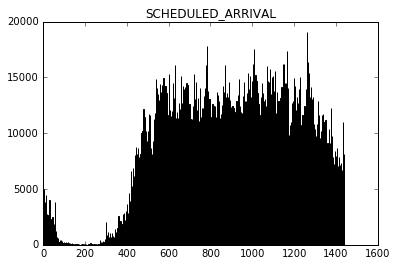

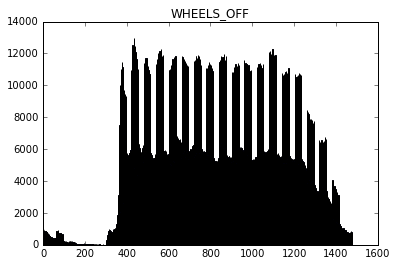

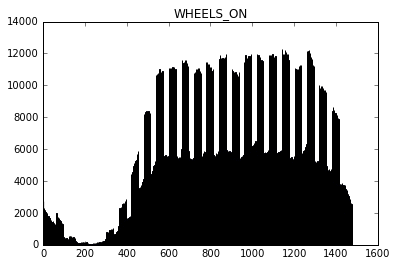

In [25]:
for col in ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'WHEELS_OFF', 'WHEELS_ON']:
    df[col] = df[col].map(lambda x : 60*(x/100) + (x % 100))
    plt.figure()
    plt.title(col)
    plt.hist(df[col], bins=1440)

<h3>DIVERTED and CANCELLED</h3>

Because DIVERTED and CANCELLED each only have one unique value, there is no need to retain those two columns.

In [26]:
df.pop('DIVERTED')
df.pop('CANCELLED')

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
5819049    0
5819050    0
5819051    0
5819052    0
5819053    0
5819054    0
5819055    0
5819056    0
5819057    0
5819058    0
5819059    0
5819060    0
5819061    0
5819062    0
5819063    0
5819064    0
5819065    0
5819066    0
5819067    0
5819068    0
5819069    0
5819070    0
5819071    0
5819072    0
5819073    0
5819074    0
5819075    0
5819076    0
5819077    0
5819078    0
Name: CANCELLED, dtype: int64

<h3>Dummifying</h3>

In [27]:
dums = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE']

for i in dums:
    print "dummifying", i
    p = df.pop(i)
    dummies = pd.get_dummies(p, prefix=i)
    df = pd.concat([df, dummies[dummies.columns[1:]]], axis=1)
print "DONE"

dummifying MONTH
dummifying DAY
dummifying DAY_OF_WEEK
dummifying AIRLINE
DONE


In [28]:
df.shape

(5714008, 76)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 76 columns):
ORIGIN_AIRPORT              object
DESTINATION_AIRPORT         object
SCHEDULED_DEPARTURE         int64
DEPARTURE_DELAY             float64
TAXI_OUT                    float64
WHEELS_OFF                  float64
SCHEDULED_TIME              float64
ELAPSED_TIME                float64
AIR_TIME                    float64
DISTANCE                    int64
WHEELS_ON                   float64
TAXI_IN                     float64
SCHEDULED_ARRIVAL           int64
ARRIVAL_DELAY               float64
PREVIOUS_ARRIVAL_DELAY      float64
PREVIOUS_DEPARTURE_DELAY    float64
MONTH_2                     uint8
MONTH_3                     uint8
MONTH_4                     uint8
MONTH_5                     uint8
MONTH_6                     uint8
MONTH_7                     uint8
MONTH_8                     uint8
MONTH_9                     uint8
MONTH_10                    uint8
MONTH_11     

<h3>ORIGIN_AIRPORT and DESTINATION_AIRPORT</h3>

The ORIGIN_AIRPORT and DESTINATION_AIRPORT columns cannot be dummified because there are over 600 unique values for each. Adding over 1200 new columns to the dataframe might make it too big for memory, considering it currently only has 78 columns and is over 1 GB. However, it might be useful to convert those columns into latitudes and longitudes.

The 'airports.csv' has the 3-character IATA code, latitude, and longitude for over 300 airports. Upon inspecting the ORIGIN_AIRPORT and DESTINATION_AIRPORT columns, it's apparent that not every value in those two columns is an IATA code. Some of them are 5-digit IDs given to each airport by the US Department of Transportation.

In [30]:
df['ORIGIN_AIRPORT'].unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'DFW', 'MKE', 'IAH',
       'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'PHL', 'SBN', 'EUG', 'IAD',
       'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT', 'SMF', 'AUS', 'MCI',
       'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA', 'SAT', 'CHS', 'SBA',
       'IND', 'CLE', 'GSP', 'BDL', 'RIC', 'BFL', 'OMA', 'RDM', 'FLL',
       'CID', 'TPA', 'SYR', 'ROC', 'TYR', 'LAN', 'GSO', 'EWR', 'PBI',
       'RSW', 'OAK', 'PVD', 'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'TUL',
       'LGA', 'LIT', 'MSY', 'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT',
       'SAV', 'CLT', 'GRB', 'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX',
       'CWA', 'TTN', 'RDU', 'CVG', 'BHM', 'ACY', 'DTW', 'RAP', 'TUS',
       'EAU', 'DLH', 'FSD', 'INL', 'SPI', 'CLD', 'COD', 'CMH', 'PSC',
       'CPR', 'ACV', 'DAL', 'PAH', 'MRY', 'ESC', 'ISN', 'PSP', 'CAE',
       'STL', 'BTV',

In [31]:
df['DESTINATION_AIRPORT'].unique()

array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'LAS',
       'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW', 'SAN',
       'RIC', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP', 'BUR', 'DAL',
       'CVG', 'SMF', 'RDU', 'BNA', 'AUS', 'DSM', 'BOI', 'ELP', 'TUS',
       'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP', 'MKE', 'JNU', 'CMH',
       'CLD', 'KTN', 'CAK', 'CLE', 'GPT', 'IND', 'SAT', 'SRQ', 'BTV',
       'CHS', 'DAY', 'TUL', 'SAV', 'COS', 'GJT', 'BZN', 'PUB', 'HRL',
       'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'ACY', 'LBB', 'JAC', 'BIL',
       'EUG', 'ASE', 'TVC', 'MTJ', 'OKC', 'PVD', 'HSV', 'CDC', 'GSO',
       'YUM', 'ABQ', 'TLH', 'EGE', 'BTR', 'MOB', 'FWA', 'BIS', 'MFR',
       'APN', 'BHM',

I managed to find two CSVs at the website of the Bureau of Transportation Statistics: one which maps BTS IDs to address strings, called <a href="https://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_AIRPORT_ID">L_AIRPORT_ID</a>, and one which maps IATA codes to address strings, called <a href="https://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_AIRPORT">L_AIRPORT</a>.

A preview of L_AIRPORT_ID is shown below:

In [32]:
bts_df = pd.read_csv('L_AIRPORT_ID.csv_')
bts_df.sample(10)

,Code,Description
4989,15222,"Tidjikja, Mauritania: Tidjikja Airport"
4737,14963,"San Pedro, Cote d'Ivoire: San Pedro Airport"
2921,13052,"La Porte, IN: La Porte Municipal"
6349,16688,"Eastman, GA: Heart of Georgia Regional"
5763,16070,"Gillam, Canada: Gillam Airport"
1258,11308,"Dothan, AL: Dothan Regional"
5517,15784,"Walaha, Vanuatu: Walaha Airport"
4849,15078,"Sweetwater, TX: Avenger Field"
2447,12549,"Kapolei, HI: Kalaeloa"
4869,15098,"Sanya, China: Phoenix International"


A preview of L_AIRPORT is shown below:

In [33]:
iata_df = pd.read_csv('L_AIRPORT.csv_')
iata_df.sample(10)

,Code,Description
4744,RRK,"Rourkela, India: Rourkela Airport"
66,A53,"Blear Lake, AK: Blear Lake Airport"
1131,CN7,"Shoal Bay, Canada: Shoal Bay Water Aerodrome"
466,AXC,"Aramac, Australia: Aramac Airport"
4747,RSA,"Santa Rosa, Argentina: Santa Rosa Airport"
4838,SCC,"Deadhorse, AK: Deadhorse Airport"
1380,DIO,"Diomede Island, AK: Diomede Heliport"
914,CA7,"Tracy, CA: Tracy Municipal"
5401,TMM,"Tamatave, Madagascar: Toamasina"
1224,CT6,"East Haddam, CT: Goodspeed"


In [34]:
bts_dict = {str(i[0]):i[1] for i in zip(bts_df['Code'], bts_df['Description'])}
iata_dict = {i[1]:i[0] for i in zip(iata_df['Code'], iata_df['Description'])}

Finally, I built a dictionary from 'airports.csv' mapping IATA code to latitude and longitude.

In [35]:
airports = pd.read_csv('airports.csv')

In [36]:
airport_dict = {i[0]:{'latitude':i[1], 'longitude':i[2]} for i in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].values}

In [37]:
for col in airports.columns:
    print col, pd.isnull(airports[col]).sum()

IATA_CODE 0
AIRPORT 0
CITY 0
STATE 0
COUNTRY 0
LATITUDE 3
LONGITUDE 3


There are three airports whose latitudes and longitudes (presumably) are NaNs. They are:

In [38]:
airports[pd.isnull(airports['LATITUDE']) == True]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [39]:
airports[pd.isnull(airports['LONGITUDE']) == True]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


I looked up the coordinates of these three airports on Wikipedia and replaced them in airport_dict.

In [40]:
airport_dict['ECP'] = {'latitude':30.358333, 'longitude':-85.795556}
airport_dict['UST'] = {'latitude':29.95925, 'longitude':-81.339722}
airport_dict['PBG'] = {'latitude':44.650833, 'longitude':-73.468056}

Since the goal is to ultimately remove the ORIGIN_AIRPORT and DEPARTURE_AIRPORT columns, I pop them off the dataframe.

In [41]:
origin_airport = df.pop('ORIGIN_AIRPORT')
destination_airport = df.pop('DESTINATION_AIRPORT')

Let's first make sure that every IATA code in both of those columns is in airport_dict:

In [42]:
set([i for i in origin_airport if len(i) == 3 and i not in airport_dict])

set()

In [43]:
set([i for i in destination_airport if len(i) == 3 and i not in airport_dict])

set()

Now let's make sure that every BTS ID in both columns is in bts_dict:

In [44]:
set([i for i in origin_airport if len(i) == 5 and i not in bts_dict])

set()

In [45]:
set([i for i in destination_airport if len(i) == 5 and i not in bts_dict])

set()

Now let's make sure that every BTS ID maps to a key in iata_dict

In [46]:
set([i for i in origin_airport if len(i) == 5 and bts_dict[i] not in iata_dict])

set()

In [47]:
set([i for i in destination_airport if len(i) == 5 and bts_dict[i] not in iata_dict])

set()

Finally, let's make sure that every BTS ID maps to an IATA code in airport_dict:

In [48]:
set([i for i in origin_airport if len(i) == 5 and iata_dict[bts_dict[i]] not in airport_dict])

{'10423'}

In [49]:
set([i for i in destination_airport if len(i) == 5 and iata_dict[bts_dict[i]] not in airport_dict])

{'10423'}

So 10423 maps to an IATA that is not in airport_dict. Upon closer inspection, we find that this BTS ID maps to Austin Bergstrom International Airport, which has the IATA code 'BSM' in iata_dict.

In [50]:
print bts_dict['10423'], iata_dict[bts_dict['10423']]

Austin, TX: Austin - Bergstrom International BSM


It turns out that BSM was the old IATA code for Bergstrom Airport, which now has the IATA code 'AUS'. That new IATA code, it turns out, is in airport_dict.

In [51]:
'AUS' in airport_dict

True

All we need to do now is update iata_dict:

In [52]:
iata_dict[bts_dict['10423']] = 'AUS'

I convert the 5-digit BTS IDs in both columns to IATA codes...

In [53]:
origin_airport = origin_airport.map(lambda x : x if x in airport_dict else iata_dict[bts_dict[str(x)]])
destination_airport = destination_airport.map(lambda x : x if x in airport_dict else iata_dict[bts_dict[str(x)]])

In [54]:
df['ORIGIN_LATITUDE'] = origin_airport.map(lambda x : airport_dict[x]['latitude'])
df['ORIGIN_LONGITUDE'] = origin_airport.map(lambda x : airport_dict[x]['longitude'])
df['DESTINATION_LATITUDE'] = destination_airport.map(lambda x : airport_dict[x]['latitude'])
df['DESTINATION_LONGITUDE'] = destination_airport.map(lambda x : airport_dict[x]['longitude'])

In [55]:
df.shape

(5714008, 78)

The preprocessing is complete, and we have a dataframe with 78 features. All we have to do now is save it.

<h1>Saving to CSV</h1>

In [56]:
df.to_csv('finaldf.csv')